**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Sistemas Cognitivos Artificiales** 

***
Datos del alumno (Nombre y Apellidos): Victor Eduardo Anchondo Trejo

Fecha: 21/Febrero/2022
***

# Actividad 2: Reconocimiento de imagenes más complejas utilizando redes neuronales convolucionales.

En esta actividad se llevará el reconocimiento de imagenes al siguiente nivel, reconociendo imágenes reales de Gatos y Perros para clasificar una imagen entrante como una u otra. En particular, algunos dataset como el reconocimiento de la escritura a mano agilizará el proceso al hacer que todas las imágenes tengan el mismo tamaño y forma, y todas fueran monocromo. Las imágenes del mundo real no son así... tienen diferentes formas, proporciones de aspecto, etc., ¡y normalmente son en color!

Así que, como parte de la tarea necesaria para el proceso de los datos... no es menos importante redimensionarlos para que tengan una forma uniforme.

Para completar esta actividad, se deben realizar los siguientes pasos:

1. Explorar los datos de ejemplo de gatos y perros
2. Preprocesar los datos
3. Construir y entrenar una red neuronal para reconocer la diferencia entre los dos
4. Evaluar la precisión del entrenamiento y la validación


# 1. Exploración de los datos

Comenzar descargando los datos de ejemplo, un .zip de 2.000 fotos JPG de gatos y perros, y extrayéndolo localmente en /tmp.

In [ ]:
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7ff231003990>)

El siguiente código en Python utiliza la biblioteca del OS para usar las bibliotecas del sistema operativo, proporcionando acceso al sistema de archivos, y la biblioteca de archivos zip, que permite descomprimir los datos.

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

A continuación se definen los directorios a utilizar para entrenar esta red neuronal

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio para la entrenamiento de las imagenes de gatos
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio para la validación de las imagenes de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio para la validación de las imagenes de perros y gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Se observan los nombres de los archivos en los directorios de los entrenamientos de perros y gatos (las convenciones de nombres de archivos son las mismas en el directorio de validación):

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.537.jpg', 'cat.895.jpg', 'cat.587.jpg', 'cat.577.jpg', 'cat.383.jpg', 'cat.781.jpg', 'cat.362.jpg', 'cat.234.jpg', 'cat.579.jpg', 'cat.513.jpg']
['dog.322.jpg', 'dog.622.jpg', 'dog.975.jpg', 'dog.549.jpg', 'dog.451.jpg', 'dog.648.jpg', 'dog.59.jpg', 'dog.942.jpg', 'dog.50.jpg', 'dog.508.jpg']


Se descubre el número total de imágenes de gatos y perros en los directorios de training y validación:

In [ ]:
# Funcion para obtener el numero de archivos dentro de un directorio
def get_files_in_folder(folder_path): 
  return len(os.listdir(folder_path))

# Funcion para obtener el numero de imagenes para entrenamiento
def get_total_train_images():
  return get_files_in_folder(train_cats_dir) + get_files_in_folder(train_dogs_dir);

# Funcion para obtener el numero de imagenes para validacion
def get_total_validation_images():
  return get_files_in_folder(validation_cats_dir) + get_files_in_folder(validation_dogs_dir);

In [ ]:
print('total training cat images :', get_files_in_folder(train_cats_dir))
print('total training dog images :', get_files_in_folder(train_dogs_dir))

print('total validation cat images :', get_files_in_folder(validation_cats_dir))
print('total validation dog images :', get_files_in_folder(validation_dogs_dir))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Se diseñará ahora una CNN para la clasificación de un problema binario (perros y gatos):

**Ejercicio 1 ( 5 puntos)**: Diseñar una red neuronal convolucional para clasificar las imagenes de perros y gatos. Evaluar los requisitos de la red neuronal que se pide y construirla completando los parametros necesarios para que las capas de la red neuronal sean optimas para la tarea de clasificar los perros y gatos.


In [ ]:
from warnings import filters
import tensorflow as tf
# tu código para la red neuronal del ejercicio 1 aquí

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# Este es el tamaño que tendran las imagenes que se utilizaran 
# Entre mas grande sea la imagen, la red tarda mas en entrenarse
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
# 3 por que es RGB y la imagen no se va a convertir a escala de grises
IMAGE_CHANNELS = 3 

# Se diseña una red de 4 capas
model = Sequential([
                    Conv2D(
                        filters=32, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(
                            IMAGE_WIDTH, 
                            IMAGE_HEIGHT, 
                            IMAGE_CHANNELS
                        )
                    ),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),

                    Conv2D(
                        filters=64, 
                        kernel_size=(3,3), 
                        activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),

                    Conv2D(
                        filters=128, 
                        kernel_size=(3,3), 
                        activation='relu'
                    ),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),

                    # Agrega tiempo extra al entrenamiento y no se nota la diferencia
                    # Conv2D(
                    #     filters=256, 
                    #     kernel_size=(3,3), 
                    #     activation='relu'
                    # ),
                    # BatchNormalization(),
                    # MaxPooling2D(pool_size=(2,2)),

                    Flatten(),
                    Dense(
                        units=512, 
                        activation='relu'
                    ),
                    BatchNormalization(),

                    Dense(
                        units=1, 
                        activation='sigmoid'
                    )
])

Se comprueba el modelo:

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_103 (Ba  (None, 148, 148, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_104 (Ba  (None, 72, 72, 64)       256       
 tchNormalization)                                               
                                                     

**Ejercicio 2 (1 punto)**: A continuación habrá que compilar el modelo, para ello usar el optimizador RMSprop, para el loss. Se debe tener en cuenta los elementos a  clasificar, en este caso perros y gatos (un clasificador binario). Como métrica mostrar la precisión.

In [ ]:
# tu código para la red neuronal del ejercicio 2 aquí

model.compile(
    loss='binary_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy']
)

# 2. Preprocesamiento de los datos

Una buena practica cuando se trate de clasificar imagenes, es pretratar los datos (imagenes) para mejorar la precisión de la CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes tienen que ser reescaldas a 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

batch_size = 50

# --------------------
# Flujo de imagenes de entrenamiento en batches de batch_size usando el "train_datagen generator"
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=IMAGE_SIZE)
# --------------------
# Flujo de imagenes de entrenamiento en batches de batch_size usando el "test_datagen generator"
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'binary',
                                                         target_size=IMAGE_SIZE)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Construcción del modelo, entreno y validación.

**Ejercicio 3 (1 puntos)**: Para concluir la creación de la CNN para la clasificación de perros y gatos, falta entrenar la red neuronal. Para ello escribir, crear la variable "history" y guardar en esa variable el modelo entrenado de la CNN. Para el entrenamiento, se deberán definir los "step_per_epoch", el número de "epochs", el número de "validation_steps" y usar "verbose=2".

In [ ]:
# tu código para la variable history que guarda el entrenamiento de la CNN del ejercicio 3 aquí

class TrainingAccuracyFit(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85):
      print('\nAlcanzado mas del 85% de precisión, epoch='+ str(epoch + 1))
      self.model.stop_training = True


total_train = get_total_train_images()
total_validate = get_total_validation_images()
max_epochs = 50

history = model.fit(    
    train_generator,
    epochs = max_epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks = [TrainingAccuracyFit()]
)

Epoch 1/50
40/40 [==============================] - 137s 3s/step - loss: 1.1593 - accuracy: 0.6360 - val_loss: 5.9950 - val_accuracy: 0.5000
Epoch 2/50
40/40 [==============================] - 134s 3s/step - loss: 0.5351 - accuracy: 0.7675 - val_loss: 5.2402 - val_accuracy: 0.5000
Epoch 3/50
40/40 [==============================] - 139s 3s/step - loss: 0.3800 - accuracy: 0.8340 - val_loss: 3.9904 - val_accuracy: 0.5000
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9190
Alcanzado mas del 85% de precisión, epoch=4
40/40 [==============================] - 136s 3s/step - loss: 0.2055 - accuracy: 0.9190 - val_loss: 2.6703 - val_accuracy: 0.5000


# 4. Evaluando la precisión y la perdida del modelo


In [71]:
#-----------------------------------------------------------
# Recuperar una lista de resultados de la lista de datos de los conjuntos de entrenamiento y pruebas para cada epoch de entrenamiento
#-----------------------------------------------------------
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  #------------------------------------------------
  # Imprimir la precisión del entrenamiento y validación por epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Precisión de entrenamiento y validación')

  plt.figure()

  #------------------------------------------------
  # Imprimir la perdida de entrenamiento y validación por epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Perdida de entrenamiento y validación')
  plt.legend()

  plt.show()

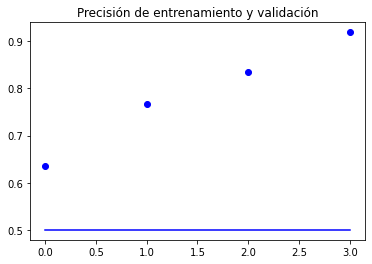

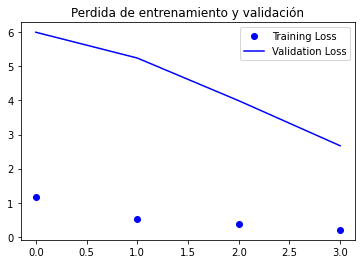

In [72]:
plot_accuracy_and_loss(history)

Como se puede observar, este es un claro ejemplo de overfitting, algo que naturalmente se quiere evitar para que las redes neuronales sean lo más precisas posibles.

**Ejercicio 4 (3 puntos)**: Para soluciónar este problema, se debe rehacer algunas partes del código anterior utilizando las técnicas de regularización aprendidas en clase, como el data augmentation.

*Consejo*: Volver a escribir otra vez todas las secciones y cambiar el código necesario aplicando las técnicas de regularización elegidas. Se debe recordar que este tipo de técnicas se suele usar en el preprocesamiento de los datos.

*Aclaración*: Se espera que al menos se use una de las técnicas de regularización aprendidas en clase. Se valorará positivamente razonar el motivo del uso de la técnica escogida (o escogidas en el caso de ser varias) y no las otras.

A modo orientativo, se espera obtener un resultado gráfico similar a este:

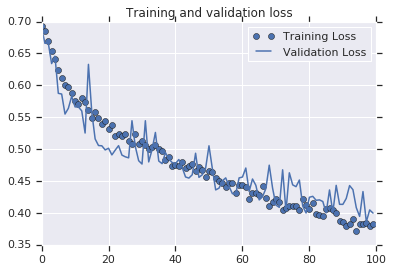
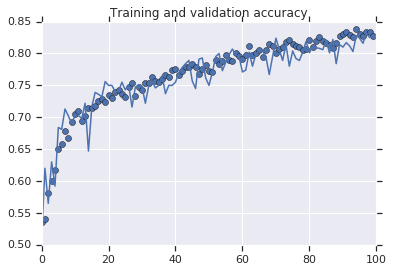

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
40/40 [==============================] - 33s 769ms/step - loss: 8.6362 - accuracy: 0.5770 - val_loss: 5.9932 - val_accuracy: 0.5000
Epoch 2/50
40/40 [==============================] - 30s 751ms/step - loss: 4.4122 - accuracy: 0.5690 - val_loss: 4.9331 - val_accuracy: 0.5000
Epoch 3/50
40/40 [==============================] - 32s 787ms/step - loss: 2.4156 - accuracy: 0.5660 - val_loss: 1.9797 - val_accuracy: 0.5000
Epoch 4/50
40/40 [==============================] - 30s 756ms/step - loss: 1.5233 - accuracy: 0.5915 - val_loss: 1.6622 - val_accuracy: 0.5000
Epoch 5/50
40/40 [==============================] - 31s 777ms/step - loss: 1.1909 - accuracy: 0.6045 - val_loss: 1.1279 - val_accuracy: 0.5020
Epoch 6/50
40/40 [==============================] - 33s 834ms/step - loss: 1.0159 - accuracy: 0.6220 - val_loss: 1.0307 - val_accuracy: 0.5040
Epoch 7/50
40/40 [==============================] - 31s 76

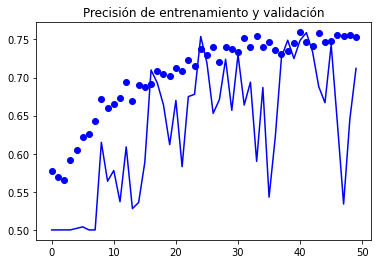

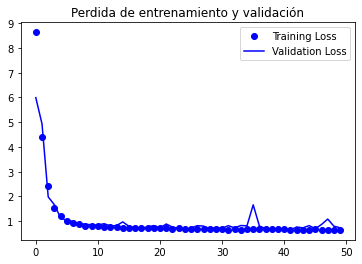

In [78]:
### Tu código aquí para la reducción del overfitting del ejercicio 4 aquí ###

from keras import regularizers

# Disminui el tamaño de las imagenes para que la red se entrene mas rapido
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
DROPOUT_VALUE = 0.25

# Diseño de la red utilizando el regularizador l2, estuve probando con dropout 
# pero no vi una mejora.
model_2 = Sequential([
                    Conv2D(
                        filters=32, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), 
                        kernel_regularizer=regularizers.l2(0.01), 
                        bias_regularizer=regularizers.l2(0.01)
                    ),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    # Dropout(DROPOUT_VALUE),

                    Conv2D(
                        filters=64, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        kernel_regularizer=regularizers.l2(0.01), 
                        bias_regularizer=regularizers.l2(0.01)
                    ),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    # Dropout(DROPOUT_VALUE),

                    Conv2D(
                        filters=128, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        kernel_regularizer=regularizers.l2(0.01), 
                        bias_regularizer=regularizers.l2(0.01)
                    ),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2)),
                    # Dropout(DROPOUT_VALUE),

                    # Conv2D(
                    #     filters=256, 
                    #     kernel_size=(3,3), 
                    #     activation='relu',
                    #     kernel_regularizer=regularizers.l2(0.01), 
                    #     bias_regularizer=regularizers.l2(0.01)
                    # ),
                    # BatchNormalization(),
                    # MaxPooling2D(pool_size=(2,2)),
                    # Dropout(DROPOUT_VALUE),

                    Flatten(),
                    Dense(
                        units=512, 
                        activation='relu', 
                        kernel_regularizer=regularizers.l2(0.01), 
                        bias_regularizer=regularizers.l2(0.01)
                    ),
                    BatchNormalization(),
                    # Dropout(DROPOUT_VALUE),

                    Dense(
                        units=1, 
                        activation='sigmoid', 
                        # kernel_regularizer=regularizers.l2(0.01), 
                        # bias_regularizer=regularizers.l2(0.01)
                    )
])


train_datagen_2 = ImageDataGenerator(rescale = 1.0/255,
                                     horizontal_flip=True,    # Gira las imagenes horizontalmente.
                                     rotation_range=40,       # Rota las imagenes aleatoriamente a 40 grados.
                                     width_shift_range=0.2,   # Mueve la imagen horizontalmente.
                                     height_shift_range=0.2,  # Mueve la imagen verticalmente.
                                     shear_range=0.2,         # Aplica la transformacion shear aleatoriamente.
                                     zoom_range=0.2,          # Aplica zoom aleatoriamente.
                                     fill_mode='nearest')     # Llena con pixeles nuevos despues de rotar la imagen.

test_datagen_2  = ImageDataGenerator(rescale = 1.0/255)

# --------------------
# Flujo de imagenes de entrenamiento en batches de batch_size usando el "train_datagen generator"
# --------------------
train_generator_2 = train_datagen_2.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=IMAGE_SIZE)
# --------------------
# Flujo de imagenes de entrenamiento en batches de batch_size usando el "test_datagen generator"
# --------------------
validation_generator_2 =  test_datagen_2.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'binary',
                                                         target_size=IMAGE_SIZE)

model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_2 = model_2.fit(    
    train_generator_2,
    epochs = max_epochs,
    validation_data = validation_generator_2,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks=[TrainingAccuracyFit()]
)

plot_accuracy_and_loss(history_2)


El entrenamiento de la red fue bastante lento, al final la precision mas grande que logre ver fue de ~75% evitando el overfitting

In [83]:
# Convierte el notebook en HTML para despues convertirlo en PDF y se vea un poco mejor
!jupyter nbconvert --to html /content/drive/MyDrive/Documents/UNIR/sistemasCognitivosArtificiales/sistemasCognitivosArtificiales_actividad2/Actividad_2_master_IA_SCA.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Documents/UNIR/sistemasCognitivosArtificiales/sistemasCognitivosArtificiales_actividad2/Actividad_2_master_IA_SCA.ipynb to html
[NbConvertApp] Writing 481416 bytes to /content/drive/MyDrive/Documents/UNIR/sistemasCognitivosArtificiales/sistemasCognitivosArtificiales_actividad2/Actividad_2_master_IA_SCA.html


In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
